<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Matt Ceriello

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

There are 230 Massachusets voters.
Tukey 5-Number Summary for Massachusets voters: 18.00    32.00    50.00    67.00    79.00


There are 230 New York voters.
Tukey 5-Number Summary for New York voters: 18.00    36.00    48.00    63.00    79.00


There are 231 South Carolina voters.
Tukey 5-Number Summary for South Carolina voters: 18.00    33.50    52.00    67.00    80.00


There are 231 Virginia voters.
Tukey 5-Number Summary for Virginia voters: 18.00    33.50    49.00    64.50    80.00


Text(0,0.5,'Frequency of Interest')

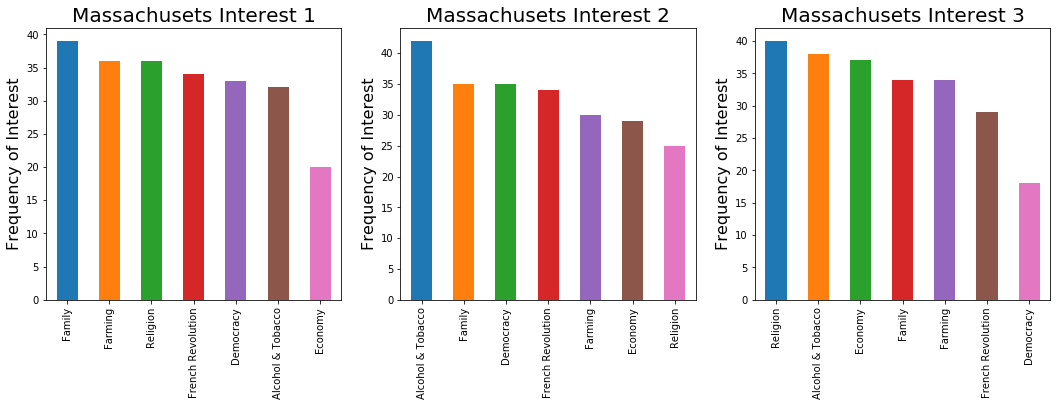

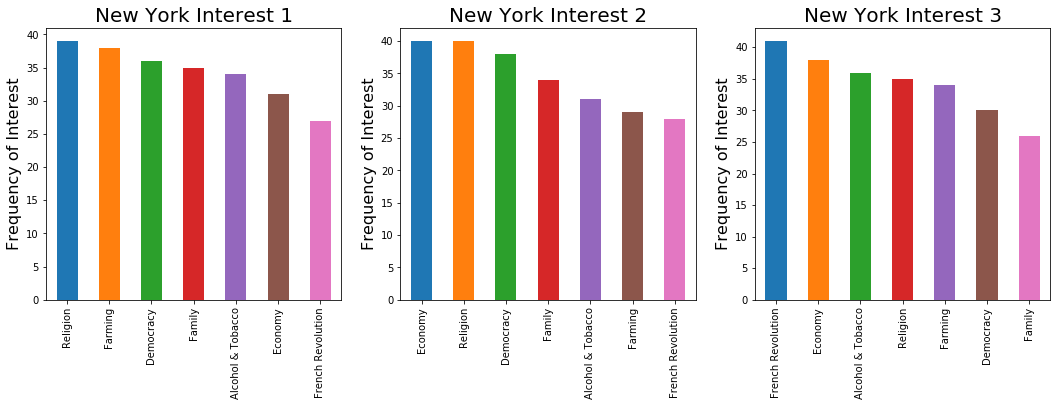

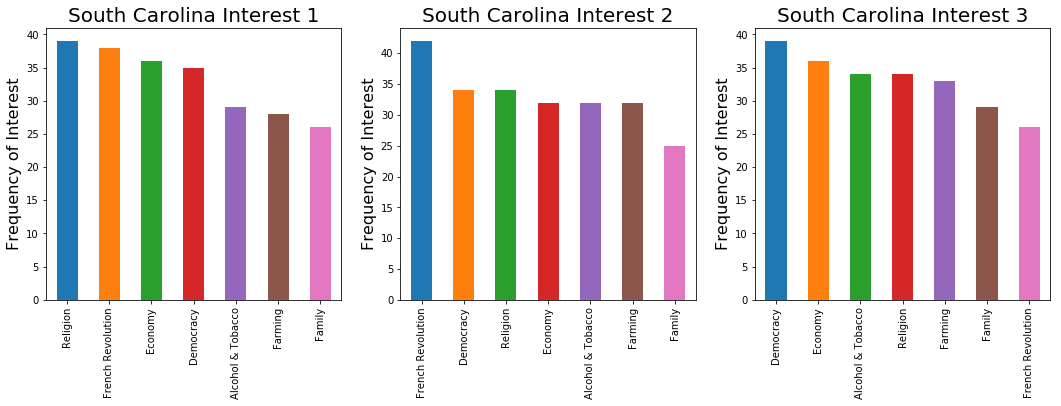

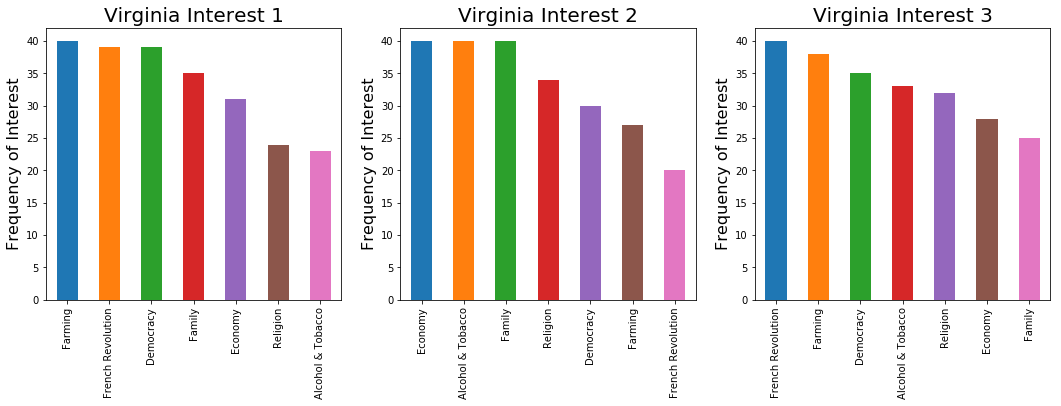

In [2]:
#Your code for 1A here
filepath = 'voters1800.csv'
df = pd.read_csv(filepath)

dfmass = df[df["State"] == "Massachusets"]
dfny = df[df["State"] == "New York"]
dfsc = df[df["State"] == "South Carolina"]
dfvir = df[df["State"] == "Virginia"]

minvalmass = dfmass["Age"].min()
maxvalmass = dfmass["Age"].max()
Q1mass = dfmass["Age"].quantile(.25) 
Q2mass = dfmass["Age"].quantile(.5) 
Q3mass = dfmass["Age"].quantile(.75)
print("There are 230 Massachusets voters.")
print("Tukey 5-Number Summary for Massachusets voters: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minvalmass, Q1mass, Q2mass, Q3mass, maxvalmass))

print("\n")
minvalny = dfny["Age"].min()
maxvalny = dfny["Age"].max()
Q1ny = dfny["Age"].quantile(.25) 
Q2ny = dfny["Age"].quantile(.5) 
Q3ny = dfny["Age"].quantile(.75) 
print("There are 230 New York voters.")
print("Tukey 5-Number Summary for New York voters: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minvalny, Q1ny, Q2ny, Q3ny, maxvalny))

print("\n")
minvalsc = dfsc["Age"].min()
maxvalsc = dfsc["Age"].max()
Q1sc = dfsc["Age"].quantile(.25) 
Q2sc = dfsc["Age"].quantile(.5) 
Q3sc = dfsc["Age"].quantile(.75) 
print("There are 231 South Carolina voters.")
print("Tukey 5-Number Summary for South Carolina voters: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minvalsc, Q1sc, Q2sc, Q3sc, maxvalsc))

print("\n")
minvalvir = dfvir["Age"].min()
maxvalvir = dfvir["Age"].max()
Q1vir = dfvir["Age"].quantile(.25) 
Q2vir = dfvir["Age"].quantile(.5) 
Q3vir = dfvir["Age"].quantile(.75)
print("There are 231 Virginia voters.")
print("Tukey 5-Number Summary for Virginia voters: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minvalvir, Q1vir, Q2vir, Q3vir, maxvalvir))

#Massachusets Interest Distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
dfmass["Interest1"].value_counts().plot(ax = axes[0],kind='bar')
axes[0].set_title("Massachusets Interest 1", fontsize=20)
axes[0].set_ylabel("Frequency of Interest", fontsize=16)
dfmass["Interest2"].value_counts().plot(ax = axes[1],kind='bar')
axes[1].set_title("Massachusets Interest 2", fontsize=20)
axes[1].set_ylabel("Frequency of Interest", fontsize=16)
dfmass["Interest3"].value_counts().plot(ax = axes[2],kind='bar')
axes[2].set_title("Massachusets Interest 3", fontsize=20)
axes[2].set_ylabel("Frequency of Interest", fontsize=16)


#New York Interest Distribution
fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
dfny["Interest1"].value_counts().plot(ax = axes1[0],kind='bar')
axes1[0].set_title("New York Interest 1", fontsize=20)
axes1[0].set_ylabel("Frequency of Interest", fontsize=16)
dfny["Interest2"].value_counts().plot(ax = axes1[1],kind='bar')
axes1[1].set_title("New York Interest 2", fontsize=20)
axes1[1].set_ylabel("Frequency of Interest", fontsize=16)
dfny["Interest3"].value_counts().plot(ax = axes1[2],kind='bar')
axes1[2].set_title("New York Interest 3", fontsize=20)
axes1[2].set_ylabel("Frequency of Interest", fontsize=16)


#South Carolina Interest Distribution
fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
dfsc["Interest1"].value_counts().plot(ax = axes2[0],kind='bar')
axes2[0].set_title("South Carolina Interest 1", fontsize=20)
axes2[0].set_ylabel("Frequency of Interest", fontsize=16)
dfsc["Interest2"].value_counts().plot(ax = axes2[1],kind='bar')
axes2[1].set_title("South Carolina Interest 2", fontsize=20)
axes2[1].set_ylabel("Frequency of Interest", fontsize=16)
dfsc["Interest3"].value_counts().plot(ax = axes2[2],kind='bar')
axes2[2].set_title("South Carolina Interest 3", fontsize=20)
axes2[2].set_ylabel("Frequency of Interest", fontsize=16)


#Virginia Interest Distribution
fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
dfvir["Interest1"].value_counts().plot(ax = axes3[0],kind='bar')
axes3[0].set_title("Virginia Interest 1", fontsize=20)
axes3[0].set_ylabel("Frequency of Interest", fontsize=16)
dfvir["Interest2"].value_counts().plot(ax = axes3[1],kind='bar')
axes3[1].set_title("Virginia Interest 2", fontsize=20)
axes3[1].set_ylabel("Frequency of Interest", fontsize=16)
dfvir["Interest3"].value_counts().plot(ax = axes3[2],kind='bar')
axes3[2].set_title("Virginia Interest 3", fontsize=20)
axes3[2].set_ylabel("Frequency of Interest", fontsize=16)




#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

**Note:** For calculating the electoral college votes for Massachusets and Virginia, I gave each state a percentage of the possible electoral votes based on how many votes each party had per state. For ex; if 75% of voters preferred the Federalists in MA, the Federalists would get 0.75*16 = 12 of the electoral votes from MA and the Democratic Republicans would get 4. 

In [3]:
#Your code for 1B here
fedtotal = 0
demreptotal = 0

#Massachusets Election
fedmass = 0
demrepmass = 0
for x in range(0,229):
    if random.random() < .501:
        fedmass += 1
    else: 
        demrepmass += 1
        
fedmpercent = (fedmass/230)
demmpercent = (demrepmass/230)
fedmelec = round(16*fedmpercent)
demmelec = round(16*demmpercent)
fedtotal += fedmelec
demreptotal += demmelec
print("There are " + str(fedmass) + " Federalists votes and " + str(demrepmass) + " Democratic Republican votes for Massachusets.")



#New York Election
fedny = 0
demrepny = 0
for y in range(0,229):
    if random.random() < .5005:
        demrepny += 1
    else: 
        fedny += 1
if demrepny > fedny:
    demreptotal += 12
else:
    fedtotal += 12
print("There are " + str(fedny) + " Federalists votes and "+ str(demrepny) + " Democratic Republican votes for New York.")



#South Carolina Election
fedsc = 0
demrepsc = 0
for z in range(0,230):
    if random.random() < .5005:
        fedsc += 1
    else: 
        demrepsc += 1
if demrepsc > fedsc:
    demreptotal += 8
else:
    fedtotal += 8
print("There are " + str(fedsc) + " Federalists votes and "+ str(demrepsc) + " Democratic Republican votes for South Carolina.")



#Virginia Election
fedvir = 0
demrepvir = 0
for x in range(0,230):
    if random.random() < .501:
        demrepvir += 1
    else: 
        fedvir += 1
        
fedvpercent = (fedvir/231)
demvpercent = (demrepvir/231)
fedvelec = round(21*fedmpercent)
demvelec = round(21*demmpercent)
fedtotal += fedvelec
demreptotal += demvelec
print("There are " + str(fedvir) + " Federalists votes and " + str(demrepvir) + " Democratic Republican votes for Virginia.\n")
print("There are " + str(fedtotal) + " total electoral college votes for the Federalists.")
print("There are " + str(demreptotal) + " total electoral college votes for the Federalists.")


There are 113 Federalists votes and 116 Democratic Republican votes for Massachusets.
There are 119 Federalists votes and 110 Democratic Republican votes for New York.
There are 111 Federalists votes and 119 Democratic Republican votes for South Carolina.
There are 115 Federalists votes and 115 Democratic Republican votes for Virginia.

There are 30 total electoral college votes for the Federalists.
There are 27 total electoral college votes for the Federalists.


#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

In [4]:
#Your Code for 1C Here
print("Democratic Republicans strategy\n")
count = 0
for x in range(0,29):
    dmper = .5
    dnper = .5
    dsper = .5
    dvper = .5
    if x%4 == 0: #mass article 
        if count %2 == 0: #religion article
            dmper += .01
            dnper -= .001
            dsper -= .001
            dvper -= .001
        
        else:  #farming
            dmper += .002
            dnper -= .001
            dsper -= (.001 + .002)
            dvper -= (.001 + .002)
        count += 1
    
    elif (x%4) == 1: #ny article 
        if count %2 == 0:
            dmper -= .001
            dnper += .03
            dsper -= .001
            dvper -= .001
            
        else:
            dmper -= .001
            dnper += .002
            dsper -= (.001 + .002)
            dvper -= (.001 + .002)        
        count += 1
    elif (x%4) ==2:  #sc article 
        if count %2 == 0:
            dmper -= .001
            dnper -= .001
            dsper += .03
            dvper -= .001
            
        else:
            dmper -= .001
            dnper -= .001
            dsper += (.002 + .002)
            dvper -= (.001 + .002)   
        count += 1
    elif (x%4) ==3:  #vir article 
        if count %2 == 0:
            dmper -= .001
            dnper -= .001
            dsper -= .001
            dvper += .002
            
        else:
            dmper -= .001
            dnper -= .001
            dsper -= (.001 + .002)
            dvper += (.03 + .002)
        count += 1
        
    if (dmper > 1):
        dmper  = 1
    elif dnper > 1:
        dnper = 1
    elif dsper > 1: 
        dsper  = 1
    elif dvper > 1:
        dvper= 1
        
     

    
fedtotal = 0    
demreptotal = 0
demrepmass = 0
fedmass = 0
for x in range(0,229):
    if random.random() < dvper - .01:
        demrepmass += 1
    else:
        fedmass += 1
demmpercent = (demrepmass/230)
fedmpercent = (fedmass/230)
demmelec = round(16*demmpercent)
fedmelec = round(16*fedmpercent)
fedtotal += fedmelec
demreptotal += demmelec
print("There are " + str(fedmass) + " Federalists votes and " + str(demrepmass) + " Democratic Republican votes for Massachusets.")       
        
fedny = 0        
demrepny = 0
for y in range(0,229):
    if random.random() < dnper +.005:
        demrepny += 1
    else: 
        fedny += 1
if demrepny > fedny:
    demreptotal += 12
else:
    fedtotal += 12
print("There are " + str(fedny) + " Federalists votes and "+ str(demrepny) + " Democratic Republican votes for New York.")      
        
fedsc = 0
demrepsc = 0
for z in range(0,230):
    if random.random() < dsper - .005:
        demrepsc += 1
    else:
        fedsc += 1
if demrepsc > fedsc:
    demreptotal += 8
else:
    fedtotal += 8
print("There are " + str(fedsc) + " Federalists votes and "+ str(demrepsc) + " Democratic Republican votes for South Carolina.")
        
fedvir = 0
demrepvir = 0
for x in range(0,230):
    if random.random() < dvper +.01:
        demrepvir += 1
    else:
        fedvir += 1
demvpercent = (demrepvir/231)
fedvpercent = (fedvir/231)
demvelec = round(21*demvpercent)
fedvelec = round(21*fedvpercent)
demreptotal += demvelec
fedtotal += fedvelec
print("There are " + str(fedvir) + " Federalists votes and " + str(demrepvir) + " Democratic Republican votes for Virginia.\n")
print("There are " + str(fedtotal) + " total electoral college votes for the Federalists.")
print("There are " + str(demreptotal) + " total electoral college votes for the Democratic Republicans.")


Democratic Republicans strategy

There are 93 Federalists votes and 136 Democratic Republican votes for Massachusets.
There are 115 Federalists votes and 114 Democratic Republican votes for New York.
There are 118 Federalists votes and 112 Democratic Republican votes for South Carolina.
There are 122 Federalists votes and 108 Democratic Republican votes for Virginia.

There are 37 total electoral college votes for the Federalists.
There are 19 total electoral college votes for the Democratic Republicans.


In [5]:
print("Federalist strategy\n")
count = 0
for x in range(0,29):
    fmper = .5
    fnper = .5
    fsper = .5
    fvper = .5
    if x%3 == 0: #SC article 
        if count %2 == 0: #Democracy article
            fmper -= .001
            fnper -= .001
            fsper += .01
            fvper -= .001
        
        else:  #farming
            fmper -= .001
            fnper -= .001
            fsper += (.002 + .002)
            fvper -= (.001 +.002)
        count += 1
    
    elif (x%3) == 1: #Vir article 
        if count %2 == 0:
            fmper -= .001
            fnper -= .001
            fsper -= .001
            fvper += .002
            
        else:
            fmper -= .001
            fnper -= .001
            fsper -= (.001 + .002)
            fvper += (.03 + .002)
        count+=1
    elif (x%3) == 3: #NY article 
        if count %2 == 0:
            fmper -= .001
            fnper += .002
            fsper -= .001 
            fvper -= .001
            
        else:
            fmper -= .001
            fnper += .002
            fsper -= (.001 + .002)
            fvper -= (.01 + .002)        
        count += 1   
       
    if (fmper > 1):
        fmper  = 1
    elif fnper > 1:
        fnper = 1
    elif fsper > 1: 
        fsper  = 1
    elif fvper > 1:
        fvper= 1
fedtotal = 0    
demreptotal = 0
demrepmass = 0
fedmass = 0
for x in range(0,229):
    if random.random() < fmper + .01:
        fedmass += 1
    else:
        demrepmass += 1
demmpercent = (demrepmass/230)
fedmpercent = (fedmass/230)
demmelec = round(16*demmpercent)
fedmelec = round(16*fedmpercent)
fedtotal += fedmelec
demreptotal += demmelec
print("There are " + str(fedmass) + " Federalists votes and " + str(demrepmass) + " Democratic Republican votes for Massachusets.")       
        
fedny = 0        
demrepny = 0
for y in range(0,229):
    if random.random() < fnper - .005:
        fedny += 1
    else: 
        demrepny += 1
if demrepny > fedny:
    demreptotal += 12
else:
    fedtotal += 12
print("There are " + str(fedny) + " Federalists votes and "+ str(demrepny) + " Democratic Republican votes for New York.")      
        
fedsc = 0
demrepsc = 0
for z in range(0,230):
    if random.random() < fsper + .005:
        fedsc += 1
    else:
        demrepsc += 1
if demrepsc > fedsc:
    demreptotal += 8
else:
    fedtotal += 8
print("There are " + str(fedsc) + " Federalists votes and "+ str(demrepsc) + " Democratic Republican votes for South Carolina.")
        
fedvir = 0
demrepvir = 0
for x in range(0,230):
    if random.random() < fvper- .01:
        fedvir += 1
    else:
        demrepvir += 1
demvpercent = (demrepvir/231)
fedvpercent = (fedvir/231)
demvelec = round(21*demvpercent)
fedvelec = round(21*fedvpercent)
demreptotal += demvelec
fedtotal += fedvelec
print("There are " + str(fedvir) + " Federalists votes and " + str(demrepvir) + " Democratic Republican votes for Virginia.\n")
print("There are " + str(fedtotal) + " total electoral college votes for the Federalists.")
print("There are " + str(demreptotal) + " total electoral college votes for the Democratic Republicans.")

Federalist strategy

There are 109 Federalists votes and 120 Democratic Republican votes for Massachusets.
There are 126 Federalists votes and 103 Democratic Republican votes for New York.
There are 118 Federalists votes and 112 Democratic Republican votes for South Carolina.
There are 135 Federalists votes and 95 Democratic Republican votes for Virginia.

There are 40 total electoral college votes for the Federalists.
There are 17 total electoral college votes for the Democratic Republicans.


**Your Discussion of 1C Here**

**Dem-Rep:** My strategy for this party is to do articles on religion and the french revolution in each of the 4 states because they are the most common interest throughout the 4 states. Each day I will alternate between a different state and flip back and forth between an interest to write about.

**Fed:** For this strategy I will campaign in Virginia, South Carolina, and New York because if I can win those states I will have the majority in electoral votes. I will only run articles on democracy and farming.


#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

**Your Code/Discussion of 1D Here**

This will affect the outcomes of both of my campaign strategies since I delegated articles to both of the states affected. We can copy in our code from part C and change how the electoral votes are won and see how we did.

In [6]:
print("Democratic Republicans strategy New Results\n")
count = 0
for x in range(0,29):
    dmper = .5
    dnper = .5
    dsper = .5
    dvper = .5
    if x%4 == 0: #mass article 
        if count %2 == 0: #religion article
            dmper += .01
            dnper -= .001
            dsper -= .001
            dvper -= .001
        
        else:  #farming
            dmper += .002
            dnper -= .001
            dsper -= (.001 + .002)
            dvper -= (.001 + .002)
        count += 1
    
    elif (x%4) == 1: #ny article 
        if count %2 == 0:
            dmper -= .001
            dnper += .03
            dsper -= .001
            dvper -= .001
            
        else:
            dmper -= .001
            dnper += .002
            dsper -= (.001 + .002)
            dvper -= (.001 + .002)        
        count += 1
    elif (x%4) ==2:  #sc article 
        if count %2 == 0:
            dmper -= .001
            dnper -= .001
            dsper += .03
            dvper -= .001
            
        else:
            dmper -= .001
            dnper -= .001
            dsper += (.002 + .002)
            dvper -= (.001 + .002)   
        count += 1
    elif (x%4) ==3:  #vir article 
        if count %2 == 0:
            dmper -= .001
            dnper -= .001
            dsper -= .001
            dvper += .002
            
        else:
            dmper -= .001
            dnper -= .001
            dsper -= (.001 + .002)
            dvper += (.03 + .002)
        count += 1
                      
    if (dmper > 1):
        dmper  = 1
    elif dnper > 1:
        dnper = 1
    elif dsper > 1: 
        dsper  = 1
    elif dvper > 1:
        dvper= 1
        
     

    
fedtotal = 6    
demreptotal = 8
           
fedny = 0        
demrepny = 0
for y in range(0,229):
    if random.random() < dnper +.005:
        demrepny += 1
    else: 
        fedny += 1
if demrepny > fedny:
    demreptotal += 12
else:
    fedtotal += 12
print("There are " + str(fedny) + " Federalists votes and "+ str(demrepny) + " Democratic Republican votes for New York.")      
        
fedsc = 0
demrepsc = 0
for z in range(0,230):
    if random.random() < dsper - .005:
        demrepsc += 1
    else:
        fedsc += 1
if demrepsc > fedsc:
    demreptotal += 8
else:
    fedtotal += 8
print("There are " + str(fedsc) + " Federalists votes and "+ str(demrepsc) + " Democratic Republican votes for South Carolina.")
        
fedvir = 0
demrepvir = 0
for x in range(0,230):
    if random.random() < dvper +.01:
        demrepvir += 1
    else:
        fedvir += 1
                      
if demrepvir > fedvir:
    demreptotal += 21
else:
    fedtotal += 21
print("There are " + str(fedvir) + " Federalists votes and " + str(demrepvir) + " Democratic Republican votes for Virginia.\n")
print("There are " + str(fedtotal) + " total electoral college votes for the Federalists.")
print("There are " + str(demreptotal) + " total electoral college votes for the Democratic Republicans.")

Democratic Republicans strategy New Results

There are 127 Federalists votes and 102 Democratic Republican votes for New York.
There are 118 Federalists votes and 112 Democratic Republican votes for South Carolina.
There are 133 Federalists votes and 97 Democratic Republican votes for Virginia.

There are 47 total electoral college votes for the Federalists.
There are 8 total electoral college votes for the Democratic Republicans.


In [7]:
print("Federalist strategy New Results \n")
count = 0
for x in range(0,29):
    fmper = .5
    fnper = .5
    fsper = .5
    fvper = .5
    if x%3 == 0: #SC article 
        if count %2 == 0: #Democracy article
            fmper -= .001
            fnper -= .001
            fsper += .01
            fvper -= .001
        
        else:  #farming
            fmper -= .001
            fnper -= .001
            fsper += (.002 + .002)
            fvper -= (.001 +.002)
        count += 1
    
    elif (x%3) == 1: #Vir article 
        if count %2 == 0:
            fmper -= .001
            fnper -= .001
            fsper -= .001
            fvper += .002
            
        else:
            fmper -= .001
            fnper -= .001
            fsper -= (.001 + .002)
            fvper += (.03 + .002)
        count+=1
    elif (x%3) == 3: #NY article 
        if count %2 == 0:
            fmper -= .001
            fnper += .002
            fsper -= .001 
            fvper -= .001
            
        else:
            fmper -= .001
            fnper += .002
            fsper -= (.001 + .002)
            fvper -= (.01 + .002)        
        count += 1   
       
    if (fmper > 1):
        fmper  = 1
    elif fnper > 1:
        fnper = 1
    elif fsper > 1: 
        fsper  = 1
    elif fvper > 1:
        fvper= 1
fedtotal = 6    
demreptotal = 8
       
        
fedny = 0        
demrepny = 0
for y in range(0,229):
    if random.random() < fnper - .005:
        fedny += 1
    else: 
        demrepny += 1
if demrepny > fedny:
    demreptotal += 12
else:
    fedtotal += 12
print("There are " + str(fedny) + " Federalists votes and "+ str(demrepny) + " Democratic Republican votes for New York.")      
        
fedsc = 0
demrepsc = 0
for z in range(0,230):
    if random.random() < fsper + .005:
        fedsc += 1
    else:
        demrepsc += 1
if demrepsc > fedsc:
    demreptotal += 8
else:
    fedtotal += 8
print("There are " + str(fedsc) + " Federalists votes and "+ str(demrepsc) + " Democratic Republican votes for South Carolina.")
        
fedvir = 0
demrepvir = 0
for x in range(0,230):
    if random.random() < fvper- .01:
        fedvir += 1
    else:
        demrepvir += 1
if demrepvir > fedvir:
    demreptotal += 21
else:
    fedtotal += 21
print("There are " + str(fedvir) + " Federalists votes and " + str(demrepvir) + " Democratic Republican votes for Virginia.\n")
print("There are " + str(fedtotal) + " total electoral college votes for the Federalists.")
print("There are " + str(demreptotal) + " total electoral college votes for the Democratic Republicans.")

Federalist strategy New Results 

There are 108 Federalists votes and 121 Democratic Republican votes for New York.
There are 121 Federalists votes and 109 Democratic Republican votes for South Carolina.
There are 132 Federalists votes and 98 Democratic Republican votes for Virginia.

There are 35 total electoral college votes for the Federalists.
There are 20 total electoral college votes for the Democratic Republicans.


<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

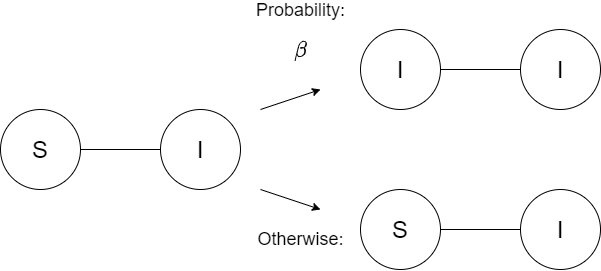

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

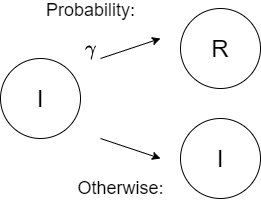

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

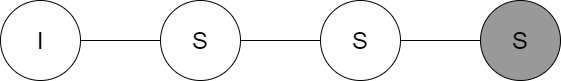

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

**Solution to Part A**: So we know $\beta = \frac{1}{2}$. After 3 steps our probability will be $\beta^3 = \frac{1}{8}$. 

For the leftmost, we know $\gamma = \frac{1}{2}$. We know $\gamma$ represents rate of recovery, so we can use $1-\gamma$ to determine whether a node is still infected or not  .So after 3 steps the probability that that node is still infected at that time is $(1 -\frac{1}{2})^3 = \frac{1}{8}$


**Part B**

Suppose we consider the
alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

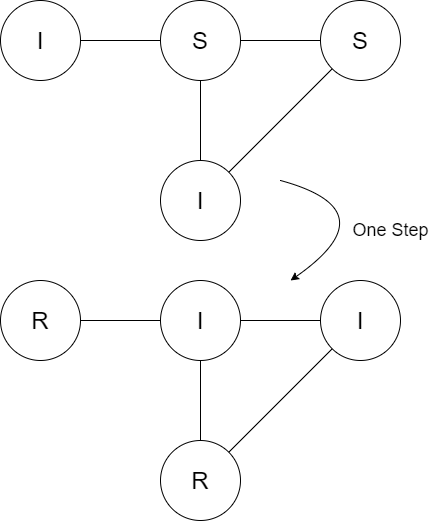

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Solution to Part B**: For the infected nodes, they have a $\frac{1}{2}$ or $\gamma$ chance of recovering. Since there is 2 we can say $\gamma^2$. For the S nodes we can say $\beta$ times $2\beta$, since one of the S nodes is connected to two I nodes. Our final probability is $$2\beta^2 * \gamma^2 = 2(\frac{1}{2})^2 * (\frac{1}{2})^2$$
$$ = \frac{1}{2} * \frac{1}{4} = \frac{1}{8}$$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

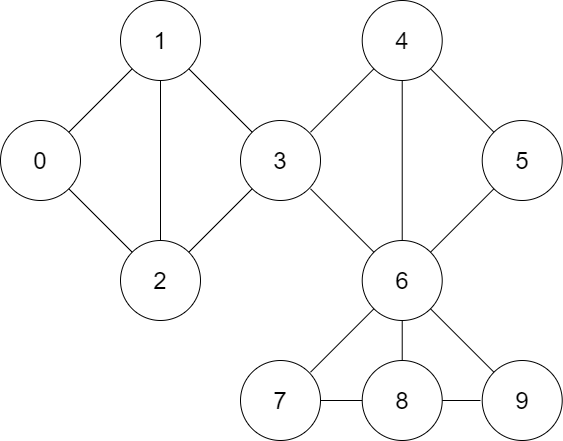

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [8]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], \
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [9]:
def SIR_step(initial_state, gamma, beta):
    #Your code here
    #print(initial_state)
    new_state = 10 * ['S']
    #edges = [[0,1],[0,2],[1,2],[1,3],[2,3],[3,4],[3,6],
             #[4,5],[4,6],[5,6],[6,7],[6,8],[6,9],[7,8],[8,9]]
    new_state = initial_state
    nodes = list(range(10))
    N = len(nodes)
    neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], \
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

    
    for x in range(10):
        if initial_state[x] == 'I':
            for y in neighbors[x]:
                if initial_state[y] == 'S':
                    if random.random() <= beta:
                        initial_state[y] = 'P' #placeholder so things dont get infected and recover in the same step
            if random.random() <= gamma:
                initial_state[x] = 'R'
            else:
                initial_state[x] = 'I'
    
    for z in range(10):
        if initial_state[z] == 'P':
            initial_state[z] = 'I'
    new_state = initial_state
    #print(new_state)    
    return(new_state)

state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
SIR_step(state, .25,.25)

['S', 'S', 'I', 'I', 'I', 'S', 'R', 'S', 'S', 'S']

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [10]:
#Check your code is working for some trivial cases:
initial_state = ['S','S','R','R','S','R','S','R','S','S']
print(SIR_step(initial_state, .25, .3))

initial_state = ['I','S','I','S','S','S','I','R','R','I']
print(SIR_step(initial_state, .2, 0))

print("Neither of these should change states since the first has no infected nodes and the second has a rate of spread of 0.")


['S', 'S', 'R', 'R', 'S', 'R', 'S', 'R', 'S', 'S']
['I', 'S', 'I', 'S', 'S', 'S', 'I', 'R', 'R', 'I']
Neither of these should change states since the first has no infected nodes and the second has a rate of spread of 0.


Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [11]:
#recommended per_run setup.  Put this in a loop/function:
df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']


#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
col = ["# Days Infected", "Node 0 Infected", "Node 1 Infected", "Node 2 Infected", "Node 3 Infected", "Node 4 Infected", "Node 5 Infected", "Node 6 Infected", "Node 7 Infected", "Node 8 Infected", "Node 9 Infected"]

df_overall= pd.DataFrame(data=None, columns=col)
df_overall_new = pd.DataFrame(data=None, columns=col)




def steps(initital_state, gamma, beta):
    for w in range(0,99):
        row = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        newrow = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        r0 = 0
        r1 = 0
        r2 = 0
        r3 = 0
        r4 = 0
        r5 = 0
        r6 = 0
        r7 = 0
        r8 = 0
        r9 = 0
        df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
        df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        for x in range(0,499):
            #print("Before SIR step" + str(row))
            if ('I' in newrow):
                newrow = SIR_step(row, gamma, beta)
                if(newrow[0]== "I"):
                    r0 += 1
                if(newrow[1]== "I"):
                    r1 += 1
                if(newrow[2]== "I"):
                    r2 += 1
                if(newrow[3]== "I"):
                    r3 += 1
                if(newrow[4]== "I"):
                    r4 += 1
                if(newrow[5]== "I"):
                    r5 += 1
                if(newrow[6]== "I"):
                    r6 += 1
                if(newrow[7]== "I"):
                    r7 += 1
                if(newrow[8]== "I"):
                    r8 += 1
                if(newrow[9]== "I"):
                    r9 += 1
                #print("After SIR step " + str(newrow))
                row = newrow
            else:
                break
                
        timeinf = max(r0,r1,r2,r3,r4,r5,r6,r7,r8,r9) 
        #print(timeinf)
        data = {"# Days Infected" : timeinf, "Node 0 Infected" : r0, "Node 1 Infected" : r1, "Node 2 Infected" : r2, "Node 3 Infected" : r3,"Node 4 Infected" : r4, "Node 5 Infected" : r5, "Node 6 Infected" : r6, "Node 7 Infected" : r7,"Node 8 Infected" : r8, "Node 9 Infected" : r9}
        #print(timeinf)
        data1 = (timeinf, r0, r1, r2, r3, r4, r5, r6, r7, r8, r9)
        df_overall.loc[w+1,:] = data1
  
state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
steps(state, .1, .1)
df_overall.head()

,# Days Infected,Node 0 Infected,Node 1 Infected,Node 2 Infected,Node 3 Infected,Node 4 Infected,Node 5 Infected,Node 6 Infected,Node 7 Infected,Node 8 Infected,Node 9 Infected
1,30.0,0.0,0.0,0.0,8.0,8.0,2.0,9.0,30.0,9.0,5.0
2,9.0,4.0,9.0,3.0,9.0,1.0,0.0,3.0,0.0,3.0,2.0
3,24.0,0.0,0.0,0.0,0.0,24.0,1.0,10.0,0.0,4.0,15.0
4,11.0,0.0,0.0,0.0,7.0,0.0,2.0,11.0,8.0,4.0,1.0
5,21.0,9.0,12.0,19.0,21.0,0.0,0.0,16.0,9.0,9.0,4.0


In [12]:
#recommended per_run setup.  Put this in a loop/function:
df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']


#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
col = ["# Days Infected", "Node 0 Infected", "Node 1 Infected", "Node 2 Infected", "Node 3 Infected", "Node 4 Infected", "Node 5 Infected", "Node 6 Infected", "Node 7 Infected", "Node 8 Infected", "Node 9 Infected"]

df_overall1= pd.DataFrame(data=None, columns=col)





def steps(initital_state, gamma, beta):
    for w in range(0,99):
        row = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        newrow = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        r0 = 0
        r1 = 0
        r2 = 0
        r3 = 0
        r4 = 0
        r5 = 0
        r6 = 0
        r7 = 0
        r8 = 0
        r9 = 0
        df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
        df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        for x in range(0,499):
            #print("Before SIR step" + str(row))
            if ('I' in newrow):
                newrow = SIR_step(row, gamma, beta)
                if(newrow[0]== "I"):
                    r0 += 1
                if(newrow[1]== "I"):
                    r1 += 1
                if(newrow[2]== "I"):
                    r2 += 1
                if(newrow[3]== "I"):
                    r3 += 1
                if(newrow[4]== "I"):
                    r4 += 1
                if(newrow[5]== "I"):
                    r5 += 1
                if(newrow[6]== "I"):
                    r6 += 1
                if(newrow[7]== "I"):
                    r7 += 1
                if(newrow[8]== "I"):
                    r8 += 1
                if(newrow[9]== "I"):
                    r9 += 1
                #print("After SIR step " + str(newrow))
                row = newrow
            else:
                break
                
        timeinf = max(r0,r1,r2,r3,r4,r5,r6,r7,r8,r9) 
        #print(timeinf)
        data = {"# Days Infected" : timeinf, "Node 0 Infected" : r0, "Node 1 Infected" : r1, "Node 2 Infected" : r2, "Node 3 Infected" : r3,"Node 4 Infected" : r4, "Node 5 Infected" : r5, "Node 6 Infected" : r6, "Node 7 Infected" : r7,"Node 8 Infected" : r8, "Node 9 Infected" : r9}
        #print(timeinf)
        data1 = (timeinf, r0, r1, r2, r3, r4, r5, r6, r7, r8, r9)
        df_overall1.loc[w+1,:] = data1
  
state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
steps(state, .05, .2)
df_overall1.head()

,# Days Infected,Node 0 Infected,Node 1 Infected,Node 2 Infected,Node 3 Infected,Node 4 Infected,Node 5 Infected,Node 6 Infected,Node 7 Infected,Node 8 Infected,Node 9 Infected
1,81.0,13.0,81.0,21.0,3.0,7.0,18.0,11.0,68.0,50.0,7.0
2,43.0,22.0,19.0,11.0,20.0,27.0,43.0,12.0,1.0,40.0,11.0
3,80.0,2.0,80.0,12.0,26.0,2.0,2.0,22.0,18.0,39.0,5.0
4,21.0,12.0,9.0,6.0,3.0,3.0,19.0,10.0,7.0,21.0,6.0
5,109.0,9.0,21.0,109.0,31.0,10.0,4.0,18.0,12.0,7.0,27.0


In [13]:
#recommended per_run setup.  Put this in a loop/function:
df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']


#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
col = ["# Days Infected", "Node 0 Infected", "Node 1 Infected", "Node 2 Infected", "Node 3 Infected", "Node 4 Infected", "Node 5 Infected", "Node 6 Infected", "Node 7 Infected", "Node 8 Infected", "Node 9 Infected"]

df_overall2= pd.DataFrame(data=None, columns=col)
df_overall_new = pd.DataFrame(data=None, columns=col)




def steps(initital_state, gamma, beta):
    for w in range(0,99):
        row = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        newrow = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        r0 = 0
        r1 = 0
        r2 = 0
        r3 = 0
        r4 = 0
        r5 = 0
        r6 = 0
        r7 = 0
        r8 = 0
        r9 = 0
        df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
        df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
        for x in range(0,499):
            #print("Before SIR step" + str(row))
            if ('I' in newrow):
                newrow = SIR_step(row, gamma, beta)
                if(newrow[0]== "I"):
                    r0 += 1
                if(newrow[1]== "I"):
                    r1 += 1
                if(newrow[2]== "I"):
                    r2 += 1
                if(newrow[3]== "I"):
                    r3 += 1
                if(newrow[4]== "I"):
                    r4 += 1
                if(newrow[5]== "I"):
                    r5 += 1
                if(newrow[6]== "I"):
                    r6 += 1
                if(newrow[7]== "I"):
                    r7 += 1
                if(newrow[8]== "I"):
                    r8 += 1
                if(newrow[9]== "I"):
                    r9 += 1
                #print("After SIR step " + str(newrow))
                row = newrow
            else:
                break
                
        timeinf = max(r0,r1,r2,r3,r4,r5,r6,r7,r8,r9) 
        #print(timeinf)
        data = {"# Days Infected" : timeinf, "Node 0 Infected" : r0, "Node 1 Infected" : r1, "Node 2 Infected" : r2, "Node 3 Infected" : r3,"Node 4 Infected" : r4, "Node 5 Infected" : r5, "Node 6 Infected" : r6, "Node 7 Infected" : r7,"Node 8 Infected" : r8, "Node 9 Infected" : r9}
        #print(timeinf)
        data1 = (timeinf, r0, r1, r2, r3, r4, r5, r6, r7, r8, r9)
        df_overall2.loc[w+1,:] = data1
  
state = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
steps(state, .2, .05)
df_overall2.head()

,# Days Infected,Node 0 Infected,Node 1 Infected,Node 2 Infected,Node 3 Infected,Node 4 Infected,Node 5 Infected,Node 6 Infected,Node 7 Infected,Node 8 Infected,Node 9 Infected
1,5.0,0.0,4.0,1.0,1.0,5.0,0.0,1.0,1.0,5.0,0.0
2,10.0,0.0,0.0,0.0,10.0,1.0,0.0,3.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0,7.0,5.0,0.0
5,13.0,0.0,0.0,1.0,6.0,3.0,0.0,13.0,7.0,12.0,0.0


**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [14]:
#recommended output style:

#for index, row in df_overall.iterrows():
    #if row["Node 0 Infected"]
v = (df_overall.loc[:,"Node 0 Infected"] == 0).sum()
per = v/100

v1 = (df_overall1.loc[:,"Node 0 Infected"] == 0).sum()
per1 = v1/100

v2 = (df_overall2.loc[:,"Node 0 Infected"] == 0).sum()
per2 = v2/100
    
    
    
print('For beta = .1 and gamma = .1 observed node zero never infected', per  ,'proportion of the time')
print('For beta = .2 and gamma = .05 observed node zero never infected', per1  ,'proportion of the time')
print('For beta = .05 and gamma = .2 observed node zero never infected', per2  ,'proportion of the time')

For beta = .1 and gamma = .1 observed node zero never infected 0.45 proportion of the time
For beta = .2 and gamma = .05 observed node zero never infected 0.01 proportion of the time
For beta = .05 and gamma = .2 observed node zero never infected 0.91 proportion of the time


** Part F: **

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

(array([ 2.,  0.,  3.,  0.,  4.,  0.,  9.,  0.,  5.,  0.,  6.,  0.,  3.,
         0., 10.,  0.,  9.,  0.,  6.,  0.,  7.,  0.,  4.,  0.,  9.,  0.,
         5.,  0.,  1.,  0.,  2.,  0.,  4.,  0.,  1.,  0.,  4.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]),
 <a list of 50 Patch objects>)

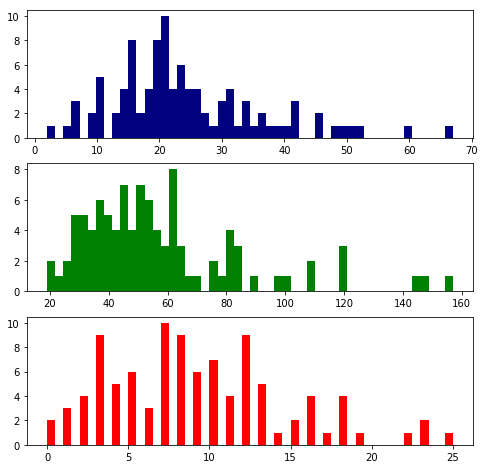

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(8,8))
g1 = df_overall.loc[:,"# Days Infected"]
g2 = df_overall1.loc[:,"# Days Infected"]
g3 = df_overall2.loc[:,"# Days Infected"]

axes[0].hist(g1, color = "navy", bins = 50)
axes[1].hist(g2, color = "green", bins = 50)
axes[2].hist(g3, color = "red", bins = 50)



** Part G: **

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

Text(0,0.5,'Avg steps spent infected')

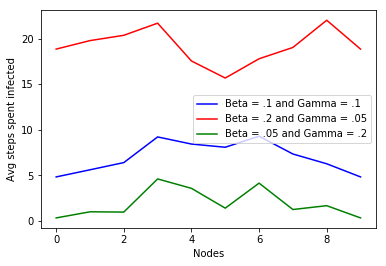

In [43]:
g1 = [0,0,0,0,0,0,0,0,0,0]
g2 = [0,0,0,0,0,0,0,0,0,0]
g3 = [0,0,0,0,0,0,0,0,0,0]

r10 = df_overall.loc[:,"Node 0 Infected"].sum()/100
r11 = df_overall.loc[:,"Node 1 Infected"].sum()/100
r12 = df_overall.loc[:,"Node 2 Infected"].sum()/100
r13 = df_overall.loc[:,"Node 3 Infected"].sum()/100
r14 = df_overall.loc[:,"Node 4 Infected"].sum()/100
r15 = df_overall.loc[:,"Node 5 Infected"].sum()/100
r16 = df_overall.loc[:,"Node 6 Infected"].sum()/100
r17 = df_overall.loc[:,"Node 7 Infected"].sum()/100
r18 = df_overall.loc[:,"Node 8 Infected"].sum()/100
r19 = df_overall.loc[:,"Node 0 Infected"].sum()/100
g1 = [r10,r11,r12,r13,r14,r15,r16,r17,r18,r19]

r20 = df_overall1.loc[:,"Node 0 Infected"].sum()/100
r21 = df_overall1.loc[:,"Node 1 Infected"].sum()/100
r22 = df_overall1.loc[:,"Node 2 Infected"].sum()/100
r23 = df_overall1.loc[:,"Node 3 Infected"].sum()/100
r24 = df_overall1.loc[:,"Node 4 Infected"].sum()/100
r25 = df_overall1.loc[:,"Node 5 Infected"].sum()/100
r26 = df_overall1.loc[:,"Node 6 Infected"].sum()/100
r27 = df_overall1.loc[:,"Node 7 Infected"].sum()/100
r28 = df_overall1.loc[:,"Node 8 Infected"].sum()/100
r29 = df_overall1.loc[:,"Node 0 Infected"].sum()/100
g2 = [r20,r21,r22,r23,r24,r25,r26,r27,r28,r29]

r30 = df_overall2.loc[:,"Node 0 Infected"].sum()/100
r31 = df_overall2.loc[:,"Node 1 Infected"].sum()/100
r32 = df_overall2.loc[:,"Node 2 Infected"].sum()/100
r33 = df_overall2.loc[:,"Node 3 Infected"].sum()/100
r34 = df_overall2.loc[:,"Node 4 Infected"].sum()/100
r35 = df_overall2.loc[:,"Node 5 Infected"].sum()/100
r36 = df_overall2.loc[:,"Node 6 Infected"].sum()/100
r37 = df_overall2.loc[:,"Node 7 Infected"].sum()/100
r38 = df_overall2.loc[:,"Node 8 Infected"].sum()/100
r39 = df_overall2.loc[:,"Node 0 Infected"].sum()/100
g3 = [r30,r31,r32,r33,r34,r35,r36,r37,r38,r39]






plt.plot(g1, color = "blue", label = '1')
plt.plot(g2, color = "red", label = '2')
plt.plot(g3, color = "green", label = '3')

leg = ["Beta = .1 and Gamma = .1", "Beta = .2 and Gamma = .05", "Beta = .05 and Gamma = .2", ]
plt.legend(leg)
plt.xlabel("Nodes")
plt.ylabel("Avg steps spent infected")


**Part H: **

Comment on anything you found interesting or unusual.

One thing I learned from this is to start assignments when they are released

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>